In [1]:
import numpy as np
from numpy import pi, fft
import scipy.io
from scipy.integrate import odeint

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
plt.rcParams['figure.figsize'] = [12, 12]
plt.rcParams.update({'font.size': 18})


In [2]:
# # load initial data
# path = 'burgers_data_R10.mat' 
# data = scipy.io.loadmat(path)
# a = np.array(data['a'])
# # a_x = np.array(data['a_x'])
# # a_smooth = np.array(data['a_smooth'])
# # a_smooth_x = np.array(data['a_smooth_x'])
# usol = np.array(data['u'])
# print(data.keys())

# # 2048 realizations of $a = u_0, usol = u_T$ with periodic condition and spatial meshsize 2^13
# print("shape: ", a.shape, usol.shape)

# error_bc = np.abs(a[:,0] - a[:,-1])
# print(np.max(error_bc), np.max(np.abs(np.mean(a, 1)))) # mean of x_1, ..., x_8192


In [4]:
# # plot u_0(x) for x_i, i = 1, ..., 8192
# L = 1.0 # length of domain
# N = 2**13 # number of discretization points
# dx = L / N
# x = np.arange(0.0, L, dx) # define x domain
# plt.plot(x, a[0,:])
# plt.plot(x, usol[0,:])
# plt.title("$u(x)$ at $t =0, 1$")
# plt.xlabel("$x$")
# plt.ylabel("$u(x)$")
# plt.grid()

In [3]:
nu = 0.01 # viscosity
L = 1.0 # length of domain
N = 2**10 # number of discretization points
dx = L / N
x = np.arange(0.0, L, dx) # define x domain

In [5]:
# initial condition
u_init = np.sin(2.0*pi*x)

# simulate PDE in spatial domain
dt = 0.01
t = np.arange(0, 100*dt, dt)
# define discrete wavenumbers 
# ((np.arange(N) + N // 2) % N - N // 2) * 2 * np.pi / L
kappa = 2*pi*fft.fftfreq(N, d=dx) 

def Burgers_eqn(u, t, kappa, nu):
    u_hat = np.fft.fft(u)
    u_x_hat = (1j)* kappa * u_hat
    u_xx_hat = -np.power(kappa, 2) * u_hat
    u_x = np.fft.ifft(u_x_hat)
    u_xx = np.fft.ifft(u_xx_hat)
    u_t = - u * u_x + nu * u_xx
    return u_t.real

In [6]:
u = odeint(Burgers_eqn, u_init, t, args=(kappa, nu))

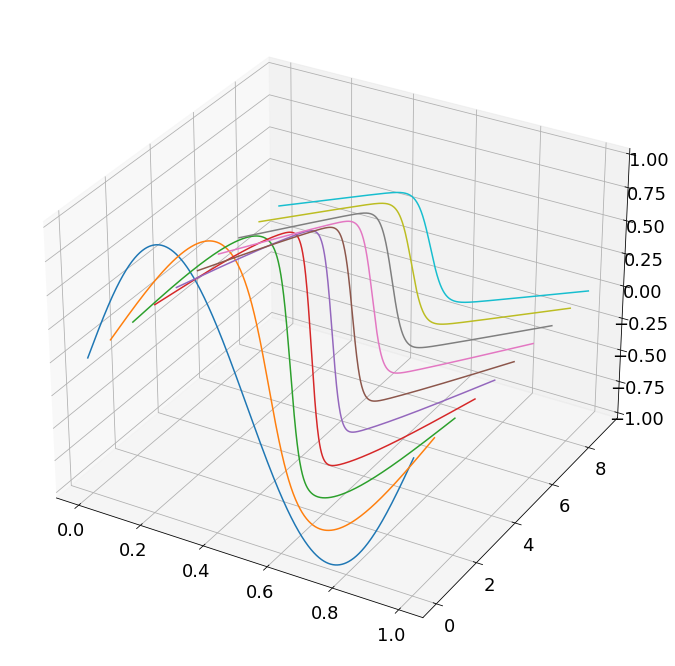

In [7]:
# waterfall plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

u_plot = u[0:-1:10,:]
for j in range(u_plot.shape[0]):
    ys = j*np.ones(u_plot.shape[1])
    ax.plot(x,ys,u_plot[j,:])

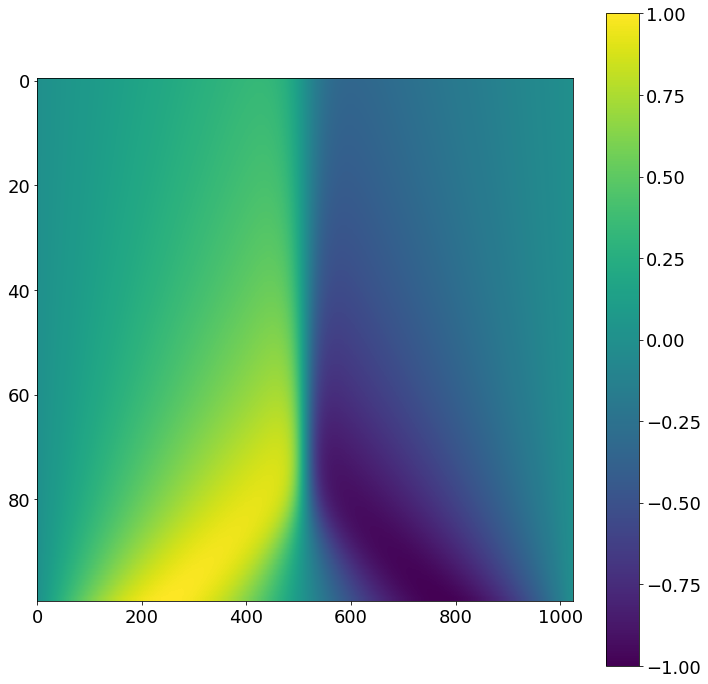

In [8]:
# image plot
plt.figure()
plt.imshow(np.flipud(u), aspect=10)
plt.colorbar()
plt.axis('on')
plt.show()